<a href="https://colab.research.google.com/github/imhilla/allmlnotebooks/blob/main/buildingblocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# the mathematical building blocks of neural networks

In [2]:
# a category in a classification problem is called class
# data points are called samples
# the class associated with a specific sample is called label


In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
# an optimizer - mechanism through which the model will update itself based on the training data it sees, so as to improve it's performance
# a loss function - how the model will be able to measure it's performance on the training data and thus how it will be able to steer itself in the right direction
# metrics to monitor during training and testing

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2640 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1068 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0697 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0501 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0374 - accuracy: 0.9887


In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 211ms/step


array([5.3008481e-08, 2.1683457e-09, 4.3680006e-06, 6.5336222e-05,
       1.4789356e-11, 3.9938488e-08, 2.9734609e-12, 9.9992508e-01,
       1.6243274e-07, 4.9875857e-06], dtype=float32)

In [15]:
new_test_digit = test_images[[0]]
new_prediction = model.predict(new_test_digit)
print(new_prediction.argmax())

1/1 [==============================] - 0s 19ms/step
7


In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.9999251

In [18]:
test_labels[0]

7

In [19]:
# evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9791
test_acc: 0.9790999889373779


In [20]:
# 2.2 Data representations for neural networks
# tensor is a container for data

In [21]:
# scalars / rank-0 tensors
# tensor that contains only one number is called a scalar or rank-0 tensor
# you can display the number of axes of a numpy tensor via ndim attribute 
# a scalar tensor has 0 axis (ndim == 0)
# the number of axes of a tensor is also called its rank.
import numpy as np
x = np.array(12)
x
x.ndim

0

In [22]:
# vectors
# an array of numbers is called a vector, or rank-1 tensor or 1D tensor.
x = np.array([12, 3, 6, 14, 7])
x
x.ndim

1

In [23]:
# matrices rank-2 tensors
# an array of vectors is a matrix, or rank-2 tensor or 2D tensor.
# a matrix has two axes, rows and columns
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [24]:
# rank 3 tensors
# if you pack matrices in a new array, you obtain a rank-3 tensor
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
x.ndim

3

In [25]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.ndim
train_images.shape
train_images.dtype

dtype('uint8')

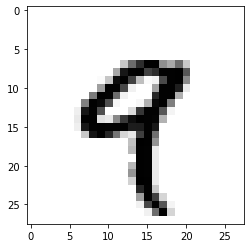

In [26]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [27]:
train_labels[4]

9

In [28]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [31]:
# notion of batches
batch = train_images[:128]
batch = train_images[128:256]
n = 3
batch = train_images[128*n:128 *(n+1)]
# print(batch)
# batch

In [32]:
# gears of neural networks: Tensor operations
# all transformations learned by deep neural networks can be reduced to a handful of tensor operations 
# or tensor functions applied to tensors of numeric data.
# a keras layers instance looks like this
# keras.layers.Dense(512, activation="relu")
# this layer can be interpreted as a function, which takes an input a matrix and returns another matrix
# a new representation for the input tensor
# output = relu(dot(input, W) + b)
# A dot product between the input tensor and a tensor named W
# An addition between the resulting matrix and a vector b
#  A relu operation relu(x) is max(x, 0) 
# relu stands for "rectified linear unit"

In [32]:
# element wise operations
# the relu operation and addition are element wise operations, operations that are applied independently 
# to each entry in the tensors being considered.

In [39]:
# naive python implementation of an element wise relu operation
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

# addition
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [46]:
# broadcasting
import numpy as np
x = np.random.random((32, 10))
y = np.random.random((10))

y = np.expand_dims(y, axis=0)
y = np.concatenate([y] * 32, axis=0)
print(y)

[[0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101 0.18401997 0.68936769 0.11834205]
 [0.82125424 0.45891808 0.56268757 0.54307141 0.43037424 0.18980795
  0.30821101

In [48]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [51]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(z.shape)

(64, 3, 32, 10)


In [56]:
# tensor product
# most common operation
# in numpy, a tensor product is done using np.dot
x = np.random.random((32))
y = np.random.random((32))
z = np.dot(x, y)
print(y)
print(z)

[0.85211545 0.68829318 0.91756967 0.11279221 0.06630616 0.08934645
 0.98069159 0.5123771  0.08772517 0.10707883 0.40151275 0.70791269
 0.66751343 0.55481153 0.19477928 0.03431796 0.47832869 0.70742049
 0.68660095 0.34727582 0.01236397 0.43324995 0.63703917 0.96231967
 0.51211965 0.72725434 0.31800895 0.74823804 0.53949933 0.56544004
 0.38517571 0.64598378]
5.695137113016683


In [57]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [58]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

In [59]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z
